# Step 1. Importing the necessary libraries I will use for this project.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Load dataset

In [6]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\data sets portfolio\marketing_sales_data.csv")
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


# Step 2. Data exploration

## Create a pairplot of the data

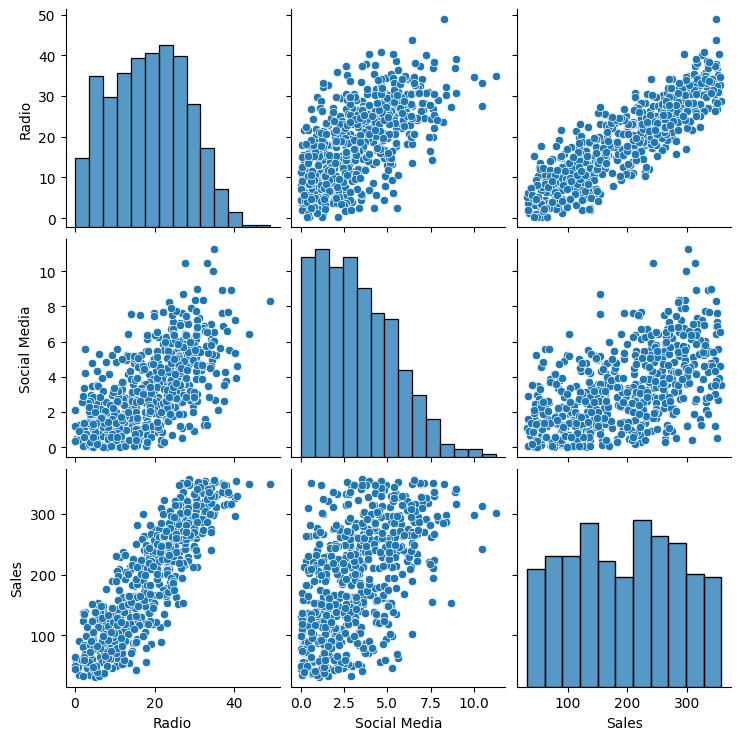

In [7]:
sns.pairplot(data);

## Calculate the mean sales for each categorical variable

In [8]:
print(data.groupby('TV')['Sales'].mean())

print('')

print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


## Remove missing data

In [9]:
data = data.dropna(axis=0)

## Clean column names

In [10]:
data = data.rename(columns={'Social Media': 'Social_Media'})

# Step 3. Model building

## Fit a multiple linear regression model that predicts sales

In [11]:
ols_formula = 'Sales ~ C(TV) + Radio'

OLS = ols(formula = ols_formula, data = data)

model = OLS.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sat, 24 May 2025   Prob (F-statistic):          1.61e-287
Time:                        19:32:02   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check model assumptions

## Model assumption: Linearity

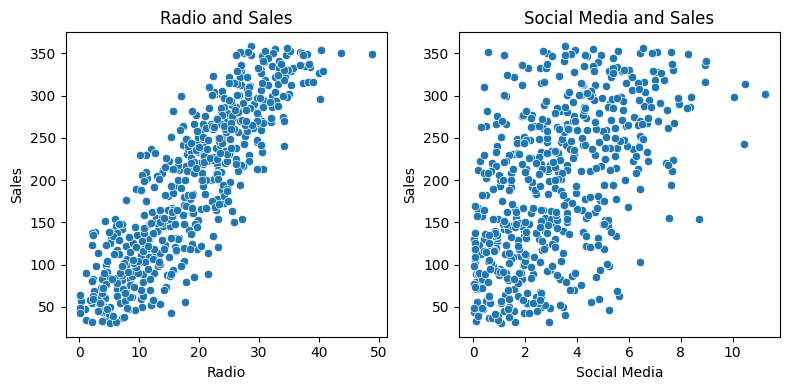

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

axes[0].set_title("Radio and Sales")

sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

axes[1].set_title("Social Media and Sales")

axes[1].set_xlabel("Social Media")

plt.tight_layout()

## Model assumption: Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

## Model assumption: Normality

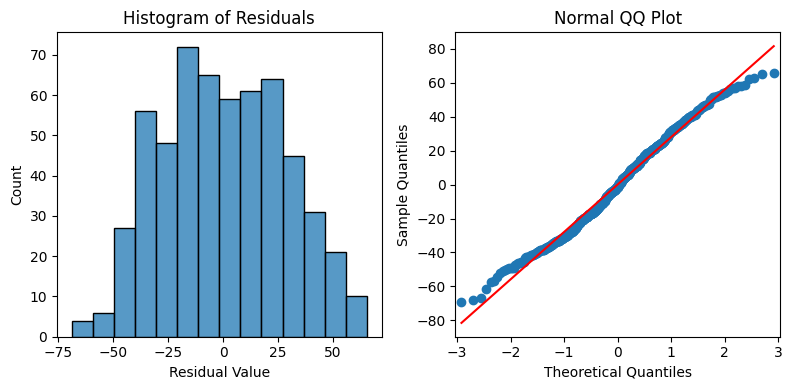

In [13]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal QQ Plot")

plt.tight_layout()
plt.show()

## Model assumption: Constant variance

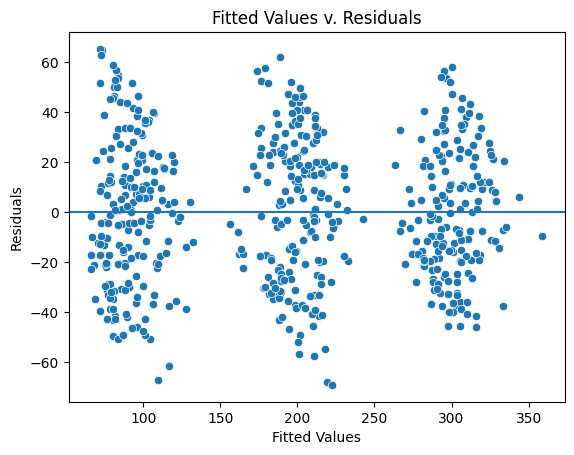

In [14]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")

fig.set_ylabel("Residuals")

fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)

plt.show()

## Model assumption: No multicollinearity

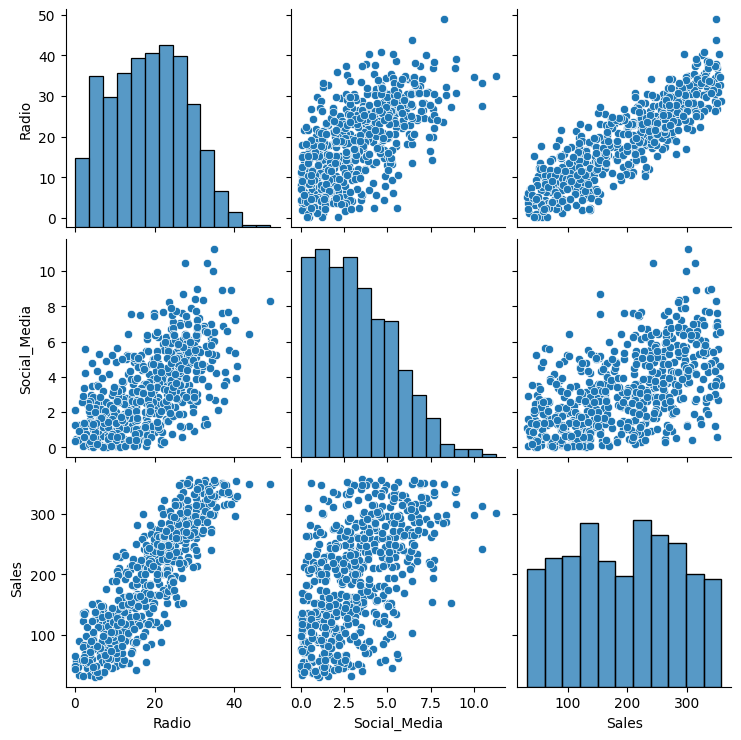

In [15]:
sns.pairplot(data)

## Calculate the variance inflation factor

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Radio','Social_Media']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


# Step 4: Results and evaluation

## Display the OLS regression results

In [17]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sat, 24 May 2025   Prob (F-statistic):          1.61e-287
Time:                        19:32:02   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpret model coefficients

When TV and Radio are used to predict Sales, the model coefficients are:

𝛽0=218.5261
 
𝛽𝑇𝑉𝐿𝑜𝑤=−154.2971
 
𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚=−75.3120
 
𝛽𝑅𝑎𝑑𝑖𝑜=2.9669

 The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium or Low TV categories compared to the High TV category when Radio is at the same level.

For example, the model predicts that a Low TV promotion is 154.2971 lower on average compared to a high TV promotion given the same Radio promotion.

The coefficient for Radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000 meaning all coefficients are statistically significant at  𝑝=0.05.
The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95% chance that the interval [−163.979, −144.616] contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤, which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

## Considerations and key takeaways

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by  $75.3120 million (95% CI  [−82.431,−68.193]) and switching from a high to low TV promotional budget reduces sales by  $154.297
million (95% CI  [−163.979,−144.616]) The model also estimates that an increase of  $1 million in the radio promotional budget will yield a  $2.9669
million increase in sales (95% CI  [2.551,3.383]).
Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales.